This is the notebook to use the summary dataframe to generate figure 1.

In [95]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
BASEDIR = '/home/yiheng/analysis/WGS'

In [97]:
# get the summary dataframe
FC1_barcode = os.path.join(BASEDIR, 'run1_barcode.tab')
FC2_barcode = os.path.join(BASEDIR, 'run2_barcode.tab')
FC3_barcode = os.path.join(BASEDIR, 'FAH05432_barcode.tab')
FC4_barcode = os.path.join(BASEDIR, 'FAH05731_barcode.tab')

FC1_hit = os.path.join(BASEDIR, 'run1_hit.tab')
FC2_hit = os.path.join(BASEDIR, 'run2_hit.tab')
FC3_hit = os.path.join(BASEDIR, 'FAH05432_hit.tab')
FC4_hit = os.path.join(BASEDIR, 'FAH05731_hit.tab')

#FC1_barcode_df = pd.read_csv(FC1_barcode)
FC2_barcode_df = pd.read_csv(FC2_barcode, sep = '\t')
FC3_barcode_df = pd.read_csv(FC3_barcode, sep = '\t')
FC4_barcode_df = pd.read_csv(FC4_barcode, sep = '\t')

#FC1_hit_df = pd.read_csv(FC1_hit, sep = '\t')
FC2_hit_df = pd.read_csv(FC2_hit, sep = '\t')
FC3_hit_df = pd.read_csv(FC3_hit, sep = '\t')
FC4_hit_df = pd.read_csv(FC4_hit, sep = '\t')



In [137]:
barcode_df = pd.concat([FC2_barcode_df, FC3_barcode_df, FC4_barcode_df], axis=1).T
hit_df = pd.concat([FC2_hit_df, FC3_hit_df, FC4_hit_df], axis=1).T

In [138]:
hit_df

,0,1,2
run2,0.258841,0.003789,0.737365
FAH05432,0.800260,0.005664,0.194061
FAH05731,0.698638,0.006431,0.294909


In [144]:
hit_df[0]

run2        0.258841
FAH05432    0.800260
FAH05731    0.698638
Name: 0, dtype: float64

In [145]:
# from raw value to percentage

#FC1_barcode_percentage = [x*100 for x in barcode_df.loc['run1']]
FC2_barcode_percentage = [x*100 for x in barcode_df.loc['run2']]
FC3_barcode_percentage = [x*100 for x in barcode_df.loc['FAH05432']]
FC4_barcode_percentage = [x*100 for x in barcode_df.loc['FAH05731']]


#FC1_hit_percentage = [x*100 for x in hit_df.loc['run1']]
rghit_percentage = [x*100 for x in hit_df[0]]
nthit_percentage = [x*100 for x in hit_df[1]]
nohit_percentage = [x*100 for x in hit_df[2]]

In [154]:
nthit_percentage

[0.37889838282795968, 0.5663531113187128, 0.64309113366629078]

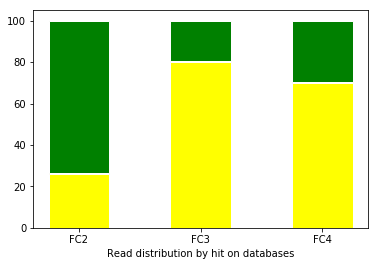

In [158]:
# plot
barWidth = 0.5
r = [0,1,2]
plt.bar(r, rghit_percentage, color='yellow', edgecolor='white', width=barWidth)
plt.bar(r, nthit_percentage, bottom=rghit_percentage, color='red', edgecolor='white', width=barWidth)
plt.bar(r, nohit_percentage, bottom=[i+j for i,j in zip(rghit_percentage, nthit_percentage)], color='green', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, ['FC2', 'FC3', 'FC4'])
plt.xlabel("Read distribution by hit on databases")

plt.show()

In [69]:
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)


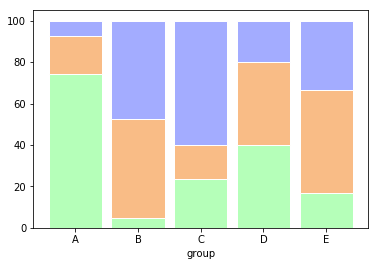

In [142]:
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")

# Show graphic
plt.show()

In [152]:
greenBars

[74.074074074074076,
 4.7619047619047619,
 23.333333333333332,
 40.0,
 16.666666666666664]

In [91]:

menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(4)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='#d62728', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel()
plt.title('Read distribution by barcodes and by hit on databases')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

ValueError: incompatible sizes: argument 'height' must be length 4 or scalar